Importing necessary libraries

In [1]:
import math
import numpy as np
import cmath
import matplotlib.pyplot as plot

Introducing the constants :Mass of atoms & Lattice constant

In [2]:
mass = 28.086*(1.67377e-27) #mass of atoms

n = open("infile.crystal", "r")
qw = n.readlines()
n.close

sw = float(qw[3])
a = sw*10e-11 #lattice constant value
#print(a) 

Basis vectors for Reciprocal Lattice

In [22]:
#lattice basis vectors
a1=np.array([0, 0.5, 0.5])
a2=np.array([0.5, 0, 0.5])
a3=np.array([0.5, 0.5, 0])

#reciprocal lattice basis vectors
b1=np.array([-1, 1, 1])
b2=np.array([1, -1, 1])
b3=np.array([1, 1, -1])

# print(b2/a)

[ 1.84867627e+09 -1.84867627e+09  1.84867627e+09]


Forming a matrix comprising of all the 17x17x17 values of Q vector using the Reciprocal basis vectors

In [4]:
#q vectors
l = np.arange(-8,9)
#print(l)
pie = math.pi
cint = 2*pie
cint1 = 17*a
c = cint/cint1
matrix=[]
matrix1=[]

#q = ((q1*b1)+(q2*b2)+(q3*b3))*c
for i in l:
    for j in l:
        for k in l:
            b1int = i*b1
            b2int = j*b2
            b3int = k*b3
            qint = b1int+b2int+b3int
            q = c*qint
            norm_q = np.linalg.norm(q)
            #print(q)
            matrix.append(q)
            matrix1.append(norm_q)
q_matrix = np.array(matrix)
norm_q_mat = np.array(matrix1)

Reading the Force constants file & storing in variable 'data'

In [5]:
m = open("infile.IFC2_Lat_006", "r")
data = m.readlines()
m.close()

Using 'data' to find Dynamical matrix & finding frequencies and eigenvectors

In [6]:
w = np.array([1,1])
x = np.array([1,2])
y = np.array([2,1])
z = np.array([2,2])

freq_mat=[]
egnvec_mat=[]

k=0
while (k<4913):
    Q=q_matrix[k]
    i=13

    d11 = np.zeros(9)
    d12 = np.zeros(9)
    d21 = np.zeros(9)
    d22 = np.zeros(9)
    
    #below while loop gives dynamical matrix for each Q vector
    while (i<7908):
        P = np.asarray(data[i].split(), dtype=float) #storing value of lattice vector
        P=P*a
        #print(P)
        mu = np.asarray(data[i+1].split(), dtype=int) #storing value of atom types in a lattice cell
        #print(mu)
        arbmat=[]
        j=2
        #storing the values of phi for the 9 possible alpha-beta combinations in a single vector
        while (j<11):
            arb = np.asarray(data[i+j].split(), dtype=float)
            arbit = arb[2]
            arbmat.append(arbit)
            j=j+1
        arbmat = np.array(arbmat)
        arbmat=arbmat*16.0218/mass
        dot_product=Q.dot(P)
        constant=(cmath.exp(complex(0,dot_product)))
        arbmat=arbmat*constant
        #print(arbmat)
        
        if np.array_equal(mu,w):
            d11=d11+arbmat
        elif np.array_equal(mu,x):
            d12=d12+arbmat
        elif np.array_equal(mu,y):
            d21=d21+arbmat
        elif np.array_equal(mu,z):
            d22=d22+arbmat
        
        i=i+12
    #re-shaping four (1x9) row vectors into (3x3) matrices
    D11 = np.reshape(d11, (3,3))
    D12 = np.reshape(d12, (3,3))
    D21 = np.reshape(d21, (3,3))
    D22 = np.reshape(d22, (3,3))
    #combining four (3x3) matrices into single (6x6) matrix which gives the dynmaical matrix
    df1 = np.concatenate((D11,D12), axis=1)
    df2 = np.concatenate((D21,D22), axis=1)
    dynm = np.concatenate((df1,df2), axis=0)
    
    #finding eigenvalues & eigenvectors for dynamical matrix at each Q vector
    egnval, egnvec = np.linalg.eigh(dynm)
    freq = np.emath.sqrt(egnval) #square root of eigenvalues give the frequencies
    

    freq_mat.append(freq)
    egnvec_mat.append(egnvec)

    #print(egnval)
    #print(egnvec)

    k=k+1

Storing Q-vector matrix, frequency matrix & eigenvector 3-d array(reshaping it to a 2d matrix) in text files

In [7]:
freq_mat1 = np.array(freq_mat)
egnvec_mat1 = np.array(egnvec_mat)
egnvec_mat2 = egnvec_mat1.reshape(-1, egnvec_mat1.shape[-1])

np.savetxt("Q_vectors.txt", q_matrix)
np.savetxt("Frequencies.txt", freq_mat1)
np.savetxt("Eigenvectors.txt", egnvec_mat2)

print(np.shape(freq_mat1))
print(np.amin(freq_mat1))
print(np.unravel_index(np.argmax(freq_mat1), freq_mat1.shape))

(4913, 6)
398208729.89968467
(2456, 5)


Plotting frequencies w.r.t magnitude of Q vectors

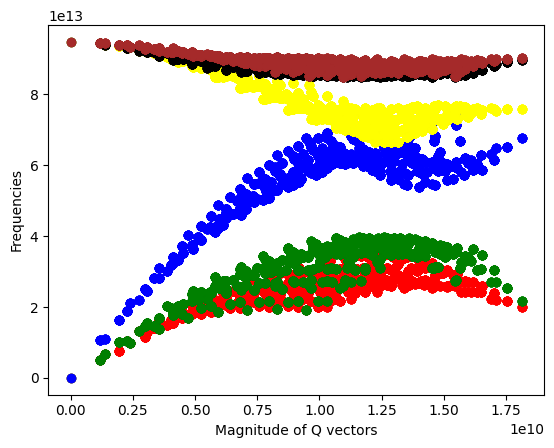

In [8]:
freq1 = freq_mat1[:,0]
freq2 = freq_mat1[:,1]
freq3 = freq_mat1[:,2]
freq4 = freq_mat1[:,3]
freq5 = freq_mat1[:,4]
freq6 = freq_mat1[:,5]

plot.scatter(norm_q_mat, freq1, c='red')
plot.scatter(norm_q_mat, freq2, c='green')
plot.scatter(norm_q_mat, freq3, c='blue')
plot.scatter(norm_q_mat, freq4, c='yellow')
plot.scatter(norm_q_mat, freq5, c='black')
plot.scatter(norm_q_mat, freq6, c='brown')

plot.xlabel("Magnitude of Q vectors")
plot.ylabel("Frequencies")

plot.show()

Defining a function to calculate frequencies

In [9]:
#inputs needed are matrix 0f q-vectors, text file stored in Data using readlines() & lattice constant
def digonalize(Q_matrix, Data, lc):
    w = np.array([1,1])
    x = np.array([1,2])
    y = np.array([2,1])
    z = np.array([2,2])

    freq_mat=[]

    k=0
    while (k<4913):
        Q=Q_matrix[k]
        i=13

        d11 = np.zeros(9)
        d12 = np.zeros(9)
        d21 = np.zeros(9)
        d22 = np.zeros(9)
        
        #below while loop gives dynamical matrix for each Q vector
        while (i<7908):
            P = np.asarray(Data[i].split(), dtype=float) #storing value of lattice vector
            P=P*lc
            #print(P)
            mu = np.asarray(Data[i+1].split(), dtype=int) #storing value of atom types in a lattice cell
            #print(mu)
            arbmat=[]
            j=2
            #storing the values of phi for the 9 possible alpha-beta combinations in a single vector
            while (j<11):
                arb = np.asarray(Data[i+j].split(), dtype=float)
                arbit = arb[2]
                arbmat.append(arbit)
                j=j+1
            arbmat = np.array(arbmat)
            arbmat=arbmat*16.0218/mass
            dot_product=Q.dot(P)
            constant=(cmath.exp(complex(0,dot_product)))
            arbmat=arbmat*constant
            #print(arbmat)
            
            if np.array_equal(mu,w):
                d11=d11+arbmat
            elif np.array_equal(mu,x):
                d12=d12+arbmat
            elif np.array_equal(mu,y):
                d21=d21+arbmat
            elif np.array_equal(mu,z):
                d22=d22+arbmat
            
            i=i+12
        #re-shaping four (1x9) row vectors into (3x3) matrices
        D11 = np.reshape(d11, (3,3))
        D12 = np.reshape(d12, (3,3))
        D21 = np.reshape(d21, (3,3))
        D22 = np.reshape(d22, (3,3))
        #combining four (3x3) matrices into single (6x6) matrix which gives the dynmaical matrix
        df1 = np.concatenate((D11,D12), axis=1)
        df2 = np.concatenate((D21,D22), axis=1)
        dynm = np.concatenate((df1,df2), axis=0)
        
        #finding eigenvalues & eigenvectors for dynamical matrix at each Q vector
        egnval = np.linalg.eigvalsh(dynm)
        freq = np.emath.sqrt(egnval) #square root of eigenvalues give the frequencies
        

        freq_mat.append(freq)

        #print(egnval)
        #print(egnvec)

        k=k+1

    return freq_mat
#output is a 2-d list of frequencies

Defining a function to calculate group velocities which:
1. Creates 3 new q_matrices, each having some values of delta-Q-x, delta-Q-y & delta-Q-z
2. Finds frequencies for each of these new q_matrices using the function defined in step1
3. Finds 3 delta_freq_matrices = newfreq_mat - freq_mat
4. Finds vel_x_matrix = delta_freq_matrices/delta-Q-x & similarly for vel_y_matrix and vel_z_matrix
5. Finds magnitude of velocity for each frequency

In [10]:
def groupvels(Freq_Mat, Q_matrix, Data, lc, Delta):
    #Creating 3 new q_matrices
    delx = np.full((len(Q_matrix)), Delta)
    dely = np.full((len(Q_matrix)), Delta)
    delz = np.full((len(Q_matrix)), Delta)

    delintx = np.zeros((np.shape(Q_matrix)))
    delinty = np.zeros((np.shape(Q_matrix)))
    delintz = np.zeros((np.shape(Q_matrix)))

    delintx[:,0] = delx
    delinty[:,1] = dely
    delintz[:,2] = delz

    qx1_matrix = Q_matrix+delintx
    qx2_matrix = Q_matrix-delintx
    qy1_matrix = Q_matrix+delinty
    qy2_matrix = Q_matrix-delinty
    qz1_matrix = Q_matrix+delintz
    qz2_matrix = Q_matrix-delintz

    #x-component of velocity of all frequencies
    freqx_mat1 = digonalize(qx1_matrix, Data, lc)
    freqx_mat1 = np.array(freqx_mat1)
    freqx_mat2 = digonalize(qx2_matrix, Data, lc)
    freqx_mat2 = np.array(freqx_mat2)
    delfreqx = freqx_mat1 - freqx_mat2
    Velx = delfreqx/(2*Delta)

    #y-component of velocity of all frequencies
    freqy_mat1 = digonalize(qy1_matrix, Data, lc)
    freqy_mat1 = np.array(freqy_mat1)
    freqy_mat2 = digonalize(qy2_matrix, Data, lc)
    freqy_mat2 = np.array(freqy_mat2)
    delfreqy = freqy_mat1 - freqy_mat2
    Vely = delfreqy/(2*Delta)

    #z-component of velocity of all frequencies
    freqz_mat1 = digonalize(qz1_matrix, Data, lc)
    freqz_mat1 = np.array(freqz_mat1)
    freqz_mat2 = digonalize(qz2_matrix, Data, lc)
    freqz_mat2 = np.array(freqz_mat2)
    delfreqz = freqz_mat1 - freqz_mat2
    Velz = delfreqz/(2*Delta)

    #magnitude of velocity for each frequency
    sqvelx = np.square(Velx)
    sqvely = np.square(Vely)
    sqvelz = np.square(Velz)
    sqvel = sqvelx+sqvely+sqvelz
    Norm_vel = np.sqrt(sqvel)

    return Velx, Vely, Velz, Norm_vel

In [11]:
delta1 = 1e5
velx1, vely1, velz1, norm_vel1 = groupvels(freq_mat1, q_matrix, data, a, delta1)
asd1 = np.linalg.norm(norm_vel1)

In [12]:
delta2 = 1e4
velx2, vely2, velz2, norm_vel2 = groupvels(freq_mat1, q_matrix, data, a, delta2)
asd2 = np.linalg.norm(norm_vel2)

In [13]:
delta3 = 1000
velx3, vely3, velz3, norm_vel3 = groupvels(freq_mat1, q_matrix, data, a, delta3)
asd3 = np.linalg.norm(norm_vel3)

In [14]:
delta4 = 100
velx4, vely4, velz4, norm_vel4 = groupvels(freq_mat1, q_matrix, data, a, delta4)
asd4 = np.linalg.norm(norm_vel4)

In [15]:
delta5 = 10
velx5, vely5, velz5, norm_vel5 = groupvels(freq_mat1, q_matrix, data, a, delta5)
asd5 = np.linalg.norm(norm_vel5)

In [16]:
delta6 = 1
velx6, vely6, velz6, norm_vel6 = groupvels(freq_mat1, q_matrix, data, a, delta6)
asd6 = np.linalg.norm(norm_vel6)

'asd' is 2-norm of the (6 X 4913)matrix comprising of the magnitude of velocity at each frequency.
Change in 'asd' as value of 'delta-q' decreases is plotted to choose optimum value for delta-q

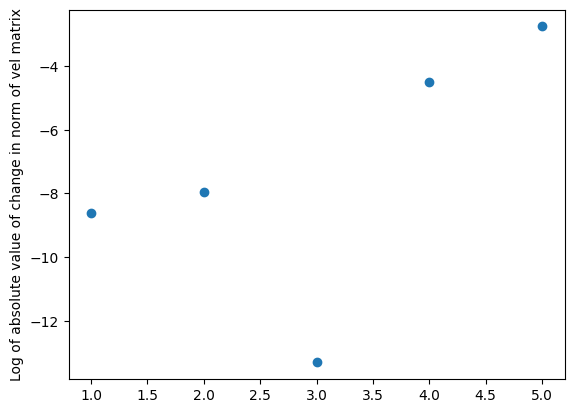

In [17]:
#change in norm of velocity matrix
diffasd = np.array((asd1-asd2,asd2-asd3,asd3-asd4,asd4-asd5,asd5-asd6))
#logarithm of the absolute value of change
logdiffasd = np.log(np.absolute(diffasd))
asdf = np.array((1,2,3,4,5))

plot.scatter(asdf,logdiffasd)
plot.ylabel("Log of absolute value of change in norm of vel matrix")
plot.show()

For delta values of 1000 & 100 the values of 'asd(norm of velocity matrix)' have least differnce so taking delta=100 and corresponding velocity values as the answer and storing them in a text file

In [18]:
velx = velx4
vely = vely4
velz = velz4
norm_vel = norm_vel4

np.savetxt("X-vel-component.txt", velx)
np.savetxt("Y-vel-component.txt", vely)
np.savetxt("Z-vel-component.txt", velz)
np.savetxt("Magnitude-vel.txt", norm_vel)


Plotting magnitude of velocities w.r.t magnitude of q-vectors

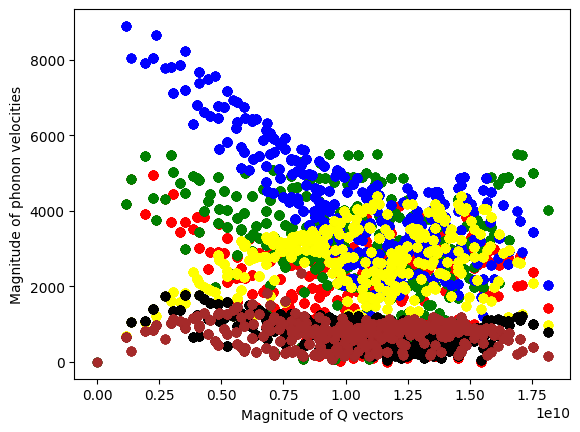

In [19]:
nvel1 = norm_vel[:,0]
nvel2 = norm_vel[:,1]
nvel3 = norm_vel[:,2]
nvel4 = norm_vel[:,3]
nvel5 = norm_vel[:,4]
nvel6 = norm_vel[:,5]

plot.scatter(norm_q_mat, nvel1, c='red')
plot.scatter(norm_q_mat, nvel2, c='green')
plot.scatter(norm_q_mat, nvel3, c='blue')
plot.scatter(norm_q_mat, nvel4, c='yellow')
plot.scatter(norm_q_mat, nvel5, c='black')
plot.scatter(norm_q_mat, nvel6, c='brown')

plot.xlabel("Magnitude of Q vectors")
plot.ylabel("Magnitude of phonon velocities")

plot.show()